Pedro Joel Burgos . LU 804/18<br>
Martin

Ejercicio 1

In [1]:
import numpy as np

def descompLU(A):
    n = A.shape[0] # n = cantidad de filas, coincide con el orden de la matriz
    L = np.eye(n)  # Creamos la matriz del mismo tamaño de A pero la matriz identidad
    U = A.astype(float)  # La matriz U comienza siendo una copia de A
    #aclaramos que toma valores con punto para cuando pase la division no alla problemas

    for j in range(n):                               # Recorremos las columnas
        if U[j, j] != 0:                             # Si el pivote es distinto de 0
            for i in range(j+1, n):                  # Convertimos en ceros los elementos bajo el pivote
                L[i, j] = U[i, j]/U[j, j]            # Escribimos el coeficiente (elemento / pivote) que se utiliza en Gauss en la matriz L       
                U[i, :] = U[i, :] - L[i, j]*U[j, :]  # Convertimos ese elemento en 0 en la matriz U
        else:
            print('Error: Hubo un 0 en la diagonal (El pivote es 0 y no existe factorizacion LU)')
            return np.eye(n), A                      # Si el pivote es 0, se devuelve la identidad y la matriz A

    return L, U

Matriz_eje1 = np.array([[2, -3, 5], [6, -1, 3], [-4, 1, -2]])
L, U = descompLU(Matriz_eje1)
print("Matriz L:")
print(L)
print("Matriz U:" )
print(U)
print("\n")

Matriz_eje2 = np.array([[1,1,1],[1,1,2],[1,3,5]])
L, U = descompLU(Matriz_eje2)
print("Matriz L:")
print(L)
print("Matriz U:")
print(U)


Matriz L:
[[ 1.     0.     0.   ]
 [ 3.     1.     0.   ]
 [-2.    -0.625  1.   ]]
Matriz U:
[[  2.   -3.    5. ]
 [  0.    8.  -12. ]
 [  0.    0.    0.5]]


Error: Hubo un 0 en la diagonal (El pivote es 0 y no existe factorizacion LU)
Matriz L:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Matriz U:
[[1 1 1]
 [1 1 2]
 [1 3 5]]


Ejercicio 3

In [2]:
from scipy.linalg import solve_triangular 

# Importamos la funcion solve_triangular, que dada una matriz triangular A y un vector b , nos resuelve el sistema Ax=b

def resolverLU(A, b):
    L, U = descompLU(A) # Reutilizamos la funcion del punto anterior
    y = solve_triangular(L, b, lower=True) # El vector 'y' tiene la solucion del sistema Ly=b . lower=True significa que la matriz es triangular inferior.
    x = solve_triangular(U, y, lower=False) # El vector 'x' tiene la solucion que buscamos (de Ax=b). lower=False significa que la matriz es triangular inferior.
    return x 

Matriz_eje3 = np.array([[1,2,1],[2,5,1],[-1,1,2]])
Matriz_b = np.array([3,4,3])

resolverLU(Matriz_eje3,Matriz_b)

array([1., 0., 2.])

Ejercicio 4

In [3]:
from scipy.linalg import lu_factor, solve_triangular

# Creamos la matriz aleatoria A y el vector aleatorio b
# por defecto, la función np.random.rand nos devuelve numeros aleatorios en el intervalo [0,1)
# pero nosotros queremos que esten en el intervalo [-1,1). Entonces ampliamos ese intervalo multiplicandolo por 2
# (pasamos a tener valores en el intervalo [0,2) ) y despues desplazamos todo el intervalo hacia la izquierda restando 1
# (pasamos a tener valores en el intervalo [-1,1) como buscabamos

A = np.random.rand(10, 10) * 2 - 1
b = np.random.rand(10) * 2 - 1

# Resolvemos el sistema con la función del ejercicio anterior. 
# En lugar de usar ˜x , llamamos 'z' al vector solucion que nos devuelve la función

z = resolverLU(A, b)

# Ahora calculamos el error relativo. Calculamos la norma 2 de b' = Az , menos la norma 2 de b, y dividimos por la norma 2 de b
# Cuando no le especificamos a la fucion linalg.norm que norma queremos, por defecto calcula la norma 2

e = np.linalg.norm(np.dot(A, z) - b) / np.linalg.norm(b)


print("La matriz aleatoria es:", A)
print("El vector aleatorio es:", b)
print("El error relativo es:", e)

La matriz aleatoria es: [[-0.21197631 -0.73729234 -0.04565497  0.55989095  0.74072979 -0.48659368
   0.60847281 -0.04883424 -0.07700371  0.74241254]
 [-0.96584077  0.65309714 -0.39492558  0.02593583  0.01323682  0.33496098
  -0.05741951 -0.19950901 -0.00769464  0.891558  ]
 [-0.03577586  0.56160714  0.91559051  0.89364779 -0.26086859 -0.71973188
  -0.84886121 -0.84555377  0.58502547  0.93532092]
 [-0.34819454  0.38296454  0.48405029 -0.11959237 -0.82696498 -0.79631955
  -0.26780639 -0.62067188  0.68597938  0.36324425]
 [-0.79085806 -0.50867725 -0.73757936  0.75635556 -0.69346507  0.73983702
  -0.54883643  0.22761037 -0.85564299 -0.8243069 ]
 [-0.77286572 -0.2588371   0.33110074  0.19433553 -0.20777261  0.1019929
   0.11621238  0.20388643 -0.2877565   0.64161378]
 [-0.87917943 -0.30379037 -0.1093627   0.10055378 -0.27220272 -0.86110129
  -0.45375928  0.98758957 -0.54112487  0.93154707]
 [-0.10062221 -0.7659364  -0.56565051 -0.84308314  0.48347564  0.90681069
   0.20689685  0.35340001  0

Conclusión: Tras probar el código varias veces, el error relativo nos dió mayormente valores entre 1 y 200. consideramos que este error es notable aunque va a depender del objetivo de uso que le demos a esta resolución del sistema. Seguramente la matriz se encuentra mal condicionada, es decir, que pequeñas perturbaciones en b, pueden generar grandes cambios en la solución, y también otro factor que pensamos que contribuye, es el orden de la matriz A y del vector b que al ser de un tamaño considerable, aumenta el error relativo.



Ejercicio 5

In [4]:
from scipy.linalg import solve_triangular

def inversa(A):
    
    n = A.shape[0]
    # n es el orden que tiene la matriz
    
    # Obtenemos la descomposición LU de la matriz A
    L, U = descompLU(A)
    
    # Creamos la matriz identidad de tamaño n x n
    I = np.eye(n)
    
    # Creamos una matriz para almacenar las soluciones de los sistemas 
    #Ly = v y Ux = y
    
    invA = np.zeros((n, n))
    
    # Para cada columna de la matriz identidad, resolvemos los sistemas Ly = v y Ux = y
    for i in range(n):
        v = I[:, i]
        y = solve_triangular(L, v, lower=True)
        x = solve_triangular(U, y, lower=False)
        invA[:, i] = x             
    # La columna i de la matriz invA va a cargarse con la solucion x
    
    return invA # Por último devolvemos la inversa de la matriz A

Ejercicio 6

In [5]:
A = np.random.rand(10, 10) * 2 - 1  # Generamos una matriz aleatoria de 10x10 en el intervalo [-1,1)

A_inv = inversa(A)       # Calculamos la inversa de A con la funcion creada en el punto anterior

B = np.dot(A_inv, A)     # producto escalar de A^(-1) * A

I = np.eye(10)           # Generamos una matriz identidad de tamaño 10x10

e = np.linalg.norm(B - I,"fro")
# https://www.youtube.com/watch?v=9IGaV_3HnGg ve este video ,es muy simple

print("La matriz A es:", B)
print("error en norma Frobenius es:", e)

La matriz A es: [[ 1.00000000e+00  4.95047199e-14  7.72864178e-14 -3.82131060e-15
   1.07134774e-15  7.93516876e-14 -1.12848798e-13 -8.47062381e-14
  -6.18578783e-14 -6.31841671e-14]
 [-7.48176831e-16  1.00000000e+00 -1.62340529e-14  1.61974679e-15
   4.71884850e-15 -1.41967033e-14  6.84280083e-14  2.30426261e-14
  -4.38150172e-15  2.81543891e-14]
 [ 1.05817412e-15 -3.19737621e-15  1.00000000e+00 -8.58108789e-15
   1.30721352e-14  9.14215888e-15  1.20905677e-14  9.68691592e-15
  -2.55576705e-14  2.52304067e-16]
 [ 1.95309364e-15  1.85970832e-14 -8.35333238e-15  1.00000000e+00
  -1.59713435e-14 -6.46705467e-15  1.43161539e-14 -1.02456497e-14
   1.94998916e-14  7.66180699e-15]
 [-1.54794607e-14 -2.31029020e-14 -4.28055326e-15  2.57762622e-14
   1.00000000e+00 -1.05866961e-14 -1.39517456e-14 -2.40147905e-15
   2.13746664e-14  1.35661012e-14]
 [-5.42469113e-16  1.02327380e-14 -1.56190865e-14  1.25522713e-14
  -1.89624750e-14  1.00000000e+00 -1.28079718e-14 -1.75914631e-14
   3.76556760e-14

Ejercicio 7

In [6]:

tam_inicial = 10       # tamaño inicial de la matriz de cada iteracion
tam_final = 201        # tamaño final de la matriz de cada iteracion
cant_iteraciones = 10  # número de veces que se repite el experimento

v1 = np.zeros(tam_final)  # creamos un vector para almacenar los errores del primer método
v2 = np.zeros(tam_final)  # creamos un vector para almacenar los errores del segundo método

for n in range(tam_inicial,tam_final): 
    for j in range(cant_iteraciones):           
        # para el tamaño de cada matriz iteramos 10 veces
        
        # Generamos una matriz y vector aleatorios
        A = np.random.rand(n, n) * 2 - 1  
        
        # Generamos un vector aleatorio x de tamaño n con valores en el intervalo [-1, 1)
        x = np.random.rand(n) * 2 - 1
        
        b = A @ x

        # Resolvemos sistema Ax = b utilizando LU_solve
        x1 = resolverLU(A,b)

        # Calculamos el logaritmo del error relativo con el primer metodo
        err1 = np.log(np.linalg.norm(A @ x1 - b, 2) / np.linalg.norm(b, 2))
        
        # Resolvemos el sistema Ax = b utilizando la inversa de A
        x2 = inversa(A) @ b

        # Calculamos el logaritmo del error relativo con el segundo metodo
        err2 = np.log(np.linalg.norm(A @ x2 - b, 2) / np.linalg.norm(b, 2))

        # Sumamos el error al vector correspondiente
        v1[n] += err1
        v2[n] += err2

# v1 y v2 van a tener 201 elementos. Los primeros 10 elementos de cada vector van a tener ceros.

Ejercicio 7

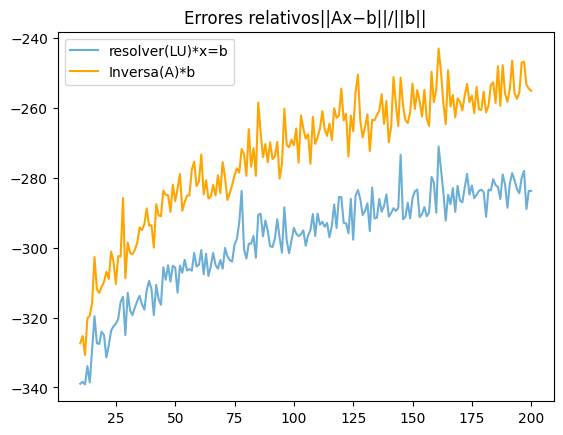

In [10]:
import matplotlib.pyplot as plt

n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='resolver(LU)*x=b', color='#6baed6')
plt.plot(n, v2[10:], label='Inversa(A)*b', color='orange')
plt.title("Errores relativos||Ax−b||/||b||" )
plt.legend()
plt.show()